In [20]:
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.stats import ks_2samp
from scipy import stats
from config import connection
# connect to the database
engine = create_engine(connection) 
Base = automap_base()
Base.prepare(engine, schema='economy', reflect=True) 

# save classes as variables, prepare classes
job = Base.classes.job
company = Base.classes.company
state = Base.classes.state
# query our database (pull data and save into objects)
session = Session(engine) 

#Extract tables from Amazon RDS postgres database
job_table = session.query(job)
print(job_table) 
company_table = session.query(company) 
print(company_table) 
state_table = session.query(state)
print(state_table) 

# using the tables to create new pandas dataframe
job_df = pd.read_sql(job_table.statement, engine.connect())
print(job_df)
company_df = pd.read_sql(company_table.statement, engine.connect())
print(company_df)
state_df = pd.read_sql(state_table.statement, engine.connect())
print(state_df)


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_71689/3576249463.py:13: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, schema='economy', reflect=True)


SELECT economy.job.job_id AS economy_job_job_id, economy.job.job_title AS economy_job_job_title, economy.job.avg_salary AS economy_job_avg_salary, economy.job.min_salary AS economy_job_min_salary, economy.job.max_salary AS economy_job_max_salary, economy.job.easy_apply AS economy_job_easy_apply, economy.job.company_id AS economy_job_company_id, economy.job.state_id AS economy_job_state_id 
FROM economy.job
SELECT economy.company.company_id AS economy_company_company_id, economy.company.state_id AS economy_company_state_id, economy.company.company_name AS economy_company_company_name, economy.company.rating AS economy_company_rating, economy.company.size AS economy_company_size, economy.company.headquarter AS economy_company_headquarter, economy.company.founded AS economy_company_founded, economy.company.type_of_ownership AS economy_company_type_of_ownership, economy.company.industry AS economy_company_industry, economy.company.sector AS economy_company_sector, economy.company.revenue A

In [21]:
df = pd.read_csv('data/clean_data.csv')
df

,Job_id,Job Title,Rating,Company_id,Company Name,Size,Founded,Type of ownership,Industry,Sector,Revenue,Easy Apply,Min_Salary,Max_Salary,Avg_Salary,State_id,City,State,Headquarter
0,0,Business Analyst - Clinical & Logistics Platform,3.9,0,Memorial Sloan-Kettering,10000+ employees,1884.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.500000e+09,0.0,56000.0,102000.0,79000.0,0,New York,NY,NY
1,2,Data Analyst,3.6,2,Asembia,501 to 1000 employees,2004.0,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,7.500000e+06,0.0,56000.0,102000.0,79000.0,2,Florham Park,NJ,NJ
2,3,"Information Security Analyst, Incident Response",3.6,3,BD,10000+ employees,1897.0,Company - Public,Health Care Products Manufacturing,Manufacturing,1.000000e+10,0.0,56000.0,102000.0,79000.0,3,Franklin Lakes,NJ,NJ
3,4,Analyst - FP&A Global Revenue,3.4,4,Rubicon Project,201 to 500 employees,2007.0,Company - Public,Internet,Information Technology,3.000000e+08,1.0,56000.0,102000.0,79000.0,4,New York,NY,CA
4,6,Investment Analyst - Graduate,3.8,6,Swiss Re,10000+ employees,1863.0,Company - Public,Insurance Agencies & Brokerages,Insurance,1.000000e+10,0.0,56000.0,102000.0,79000.0,6,New York,NY,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,3685,Sales Strategy and Insights Analyst,3.3,3685,PowerSchool,1001 to 5000 employees,1997.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,3.000000e+08,0.0,58000.0,103000.0,80500.0,3685,Austin,TX,CA
2561,3686,Urgent - Business Analyst (Information Technol...,5.0,3686,"Staffigo Technical Services, LLC",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,7.500000e+07,0.0,58000.0,103000.0,80500.0,3686,Austin,TX,IL
2562,3687,Pega Business Analyst,3.1,3687,Tista Science and Technology Corporation,501 to 1000 employees,2005.0,Company - Private,Consulting,Business Services,7.500000e+06,0.0,58000.0,103000.0,80500.0,3687,Austin,TX,MD
2563,3688,Jr.Business Analyst,5.0,3688,"Staffigo Technical Services, LLC",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,7.500000e+07,0.0,58000.0,103000.0,80500.0,3688,Austin,TX,IL


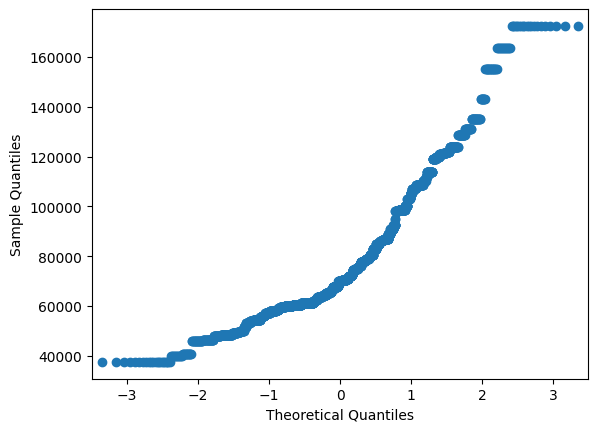

In [22]:
##QQ PLOT
import pandas as pd 
import statsmodels.api as sm 
import matplotlib as plt 
import numpy as np 
df = pd.read_csv('data/clean_data.csv')
fig=sm.qqplot(df["Avg_Salary"])


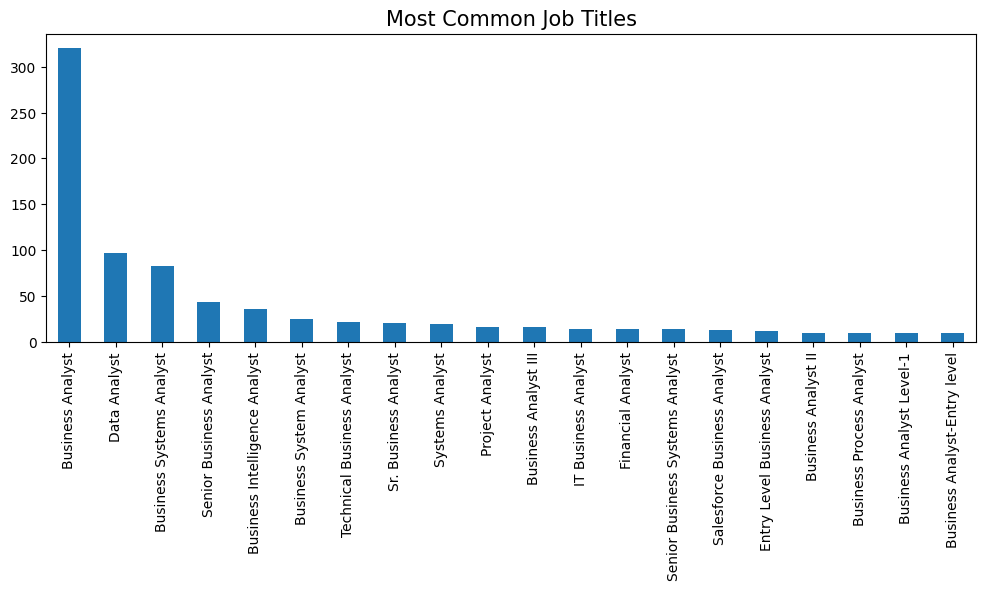

In [23]:
import matplotlib.pylab as plt
df['Job Title'].value_counts()[:20].plot(kind='bar', figsize=(12,4)) 
plt.title('Most Common Job Titles', fontsize=15, fontweight='normal')
plt.savefig('image/most_common_job.jpg')

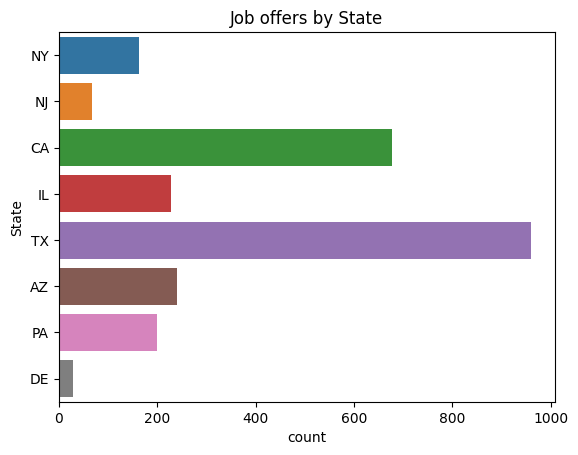

In [24]:
sns.countplot(y='State',data= df)
plt.title('Job offers by State', fontsize=12, fontweight='normal')
plt.savefig('image/job_offeres_by_state.jpg')

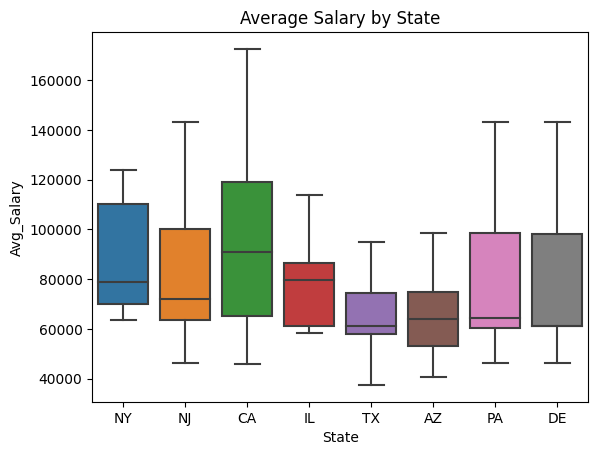

In [25]:
sns.boxplot(x= 'State', y= 'Avg_Salary', data= df, showfliers=False)
plt.title('Average Salary by State', fontsize=12, fontweight='normal')
plt.savefig('image/avg_salary.jpg')

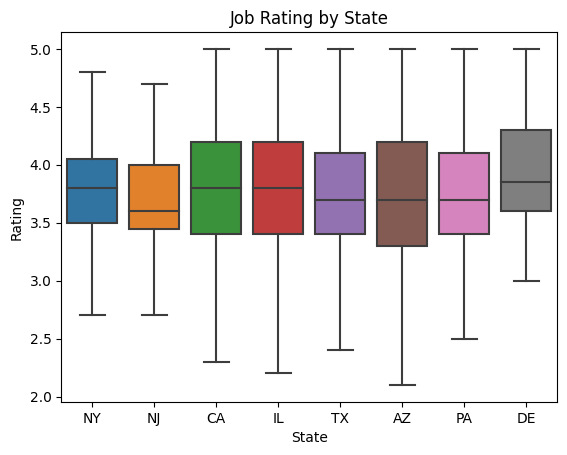

In [26]:
sns.boxplot(x= 'State', y= 'Rating', data= df, showfliers=False)
plt.title('Job Rating by State', fontsize=12, fontweight='normal')
plt.savefig('image/job_rating.jpg')

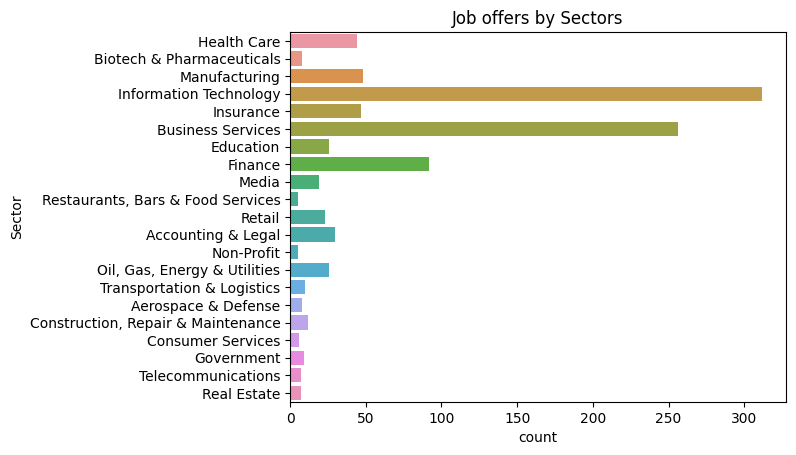

In [27]:
sns.countplot(y='Sector', data= df[:1000])
plt.title('Job offers by Sectors', fontsize=12, fontweight='normal')
plt.savefig('image/job_sectors.jpg')

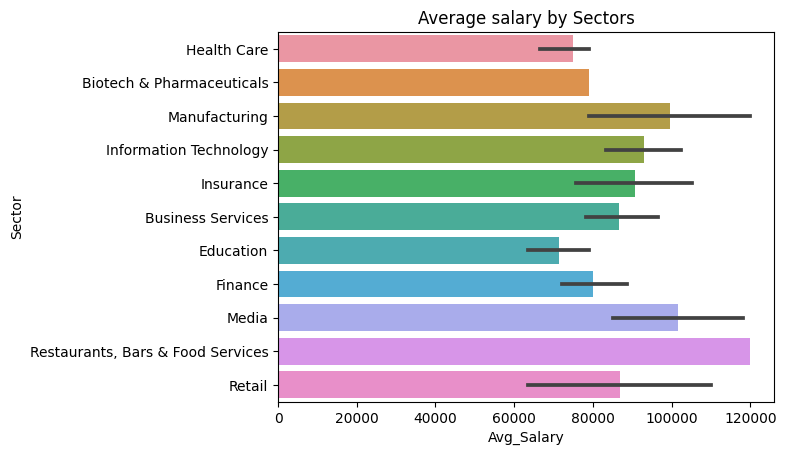

In [28]:
sns.barplot(x='Avg_Salary',y='Sector',data=df[:100])
plt.title('Average salary by Sectors', fontsize=12, fontweight='normal')
plt.savefig('image/avg_salary_sectors.jpg')


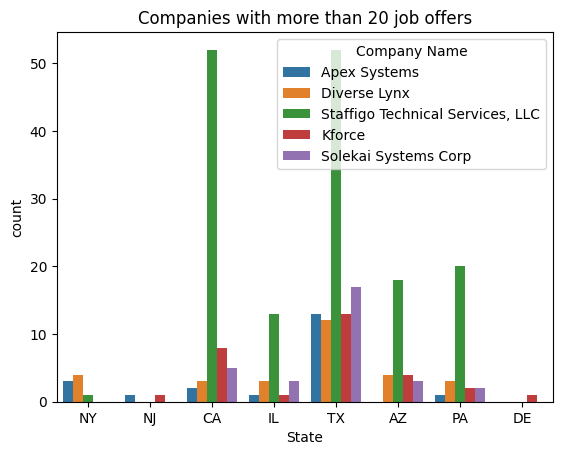

In [45]:
com20 = df['Company Name'].map(df['Company Name'].value_counts()) > 20
com20
sns.countplot(x='State', hue='Company Name', data= df[com20])
plt.title('Companies with more than 20 job offers', fontsize=12, fontweight='normal')
plt.savefig('image/company_20jobs.jpg')

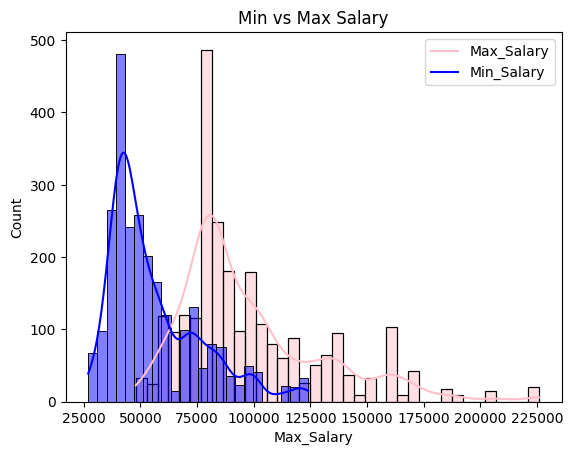

In [30]:
sns.histplot(df['Max_Salary'],kde= True, color ='pink')
sns.histplot(df['Min_Salary'], kde= True, color = 'blue')
plt.legend(loc= 'upper right', labels = ['Max_Salary','Min_Salary'])
plt.title('Min vs Max Salary', fontsize=12, fontweight='normal') 
plt.savefig('image/min_max_salary.jpg')

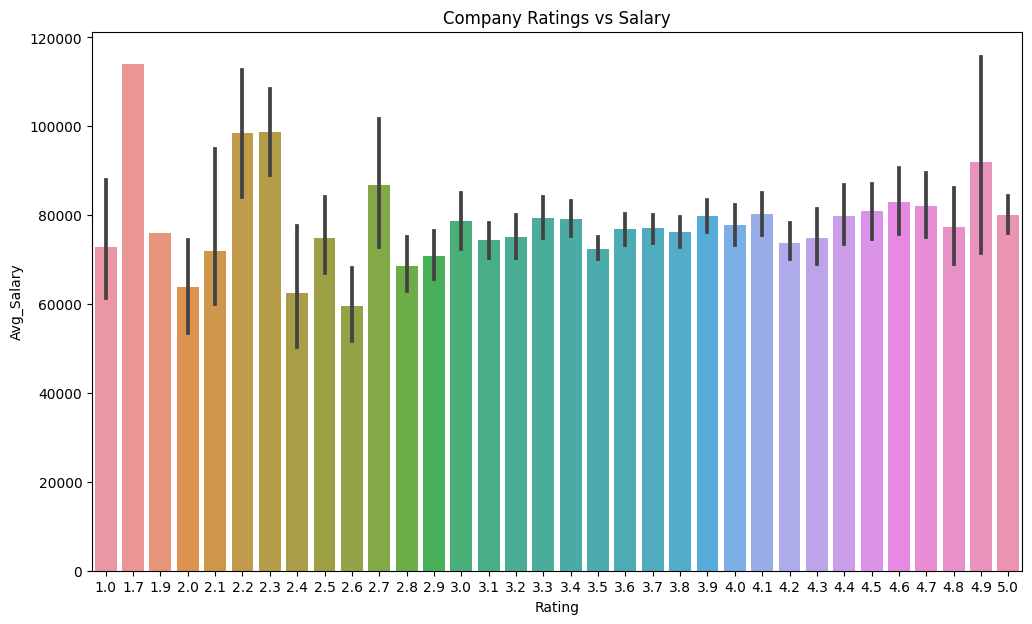

In [31]:
fig = plt.figure(figsize=(12, 7))
sns.barplot(x='Rating', y='Avg_Salary', data=df)
plt.title('Company Ratings vs Salary',fontsize=12)
plt.savefig('image/rating_salary.jpg')

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_71689/650038615.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = modified_df.corr()


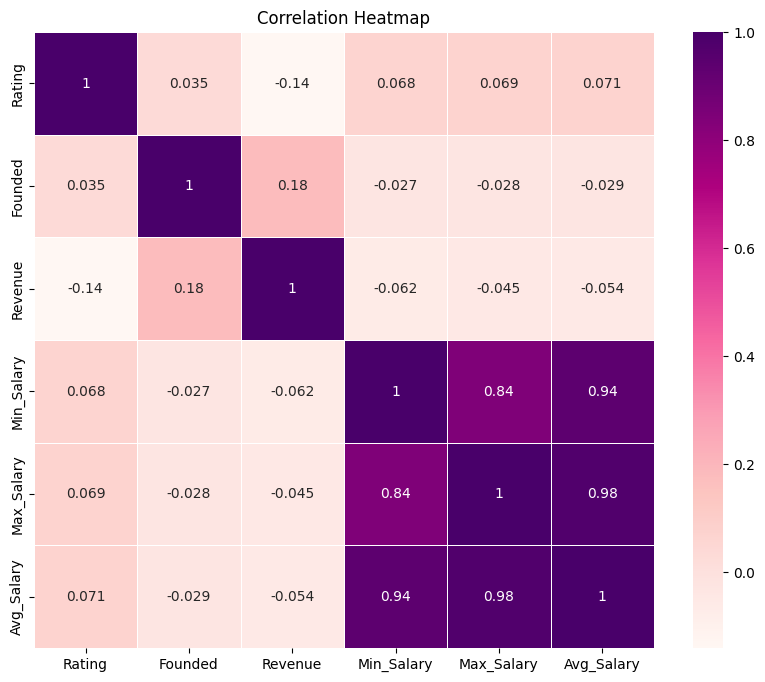

In [32]:

newdf=pd.read_csv('data/clean_data.csv')
# Drop columns job_id and company_id from  DF
columns_to_drop = ['Job_id', 'Company_id', 'Easy Apply', 'State_id']  
modified_df = newdf.drop(columns_to_drop, axis=1)

# Calculate the correlation matrix
correlation_matrix = modified_df.corr()

# Create the correlation heatmap
plt.figure(figsize=(10, 8)) 

# Customize the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', linewidths=0.5)

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


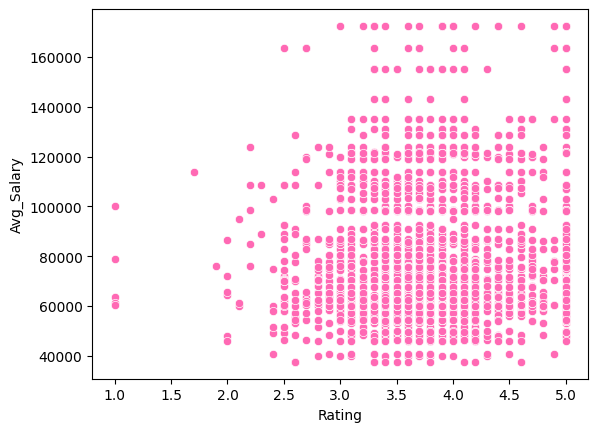

In [33]:
sns.scatterplot(data=df, y="Avg_Salary", x="Rating", color= "#FF69B4")
plt.savefig('image/avg_salary_rating.jpg')

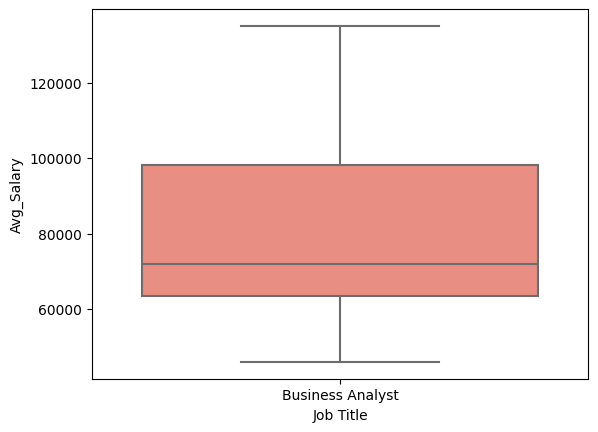

In [34]:
df2= df[df['Job Title']=='Business Analyst']
sns.boxplot(x= 'Job Title', y= 'Avg_Salary', data= df2, showfliers=False, color = 'salmon')
plt.savefig('image/avgsalaryof_businessA.jpg')
